<a href="https://colab.research.google.com/github/yamihe19/Project-ExploratoryDataAnalysis--and-autompgPrediction/blob/main/Code_Project_mpg_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)for Dataset: auto-mpg

* mpg: miles per gallon - continuous
* cyl: number of cylinders – multi-valued discrete
* disp: engine displacement or engine size - continuous
* hp: horsepower - continuous
* wt: vehicle weight - continuous
* acc: time taken to accelerate - continuous
* yr: model year – multi-valued discrete
* origin: multi-valued discrete
* car name: car model name

#### The variable to predict is mpg

## Importing packages

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import missingno as msno
import seaborn as sns
import re
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Importing data

In [ ]:
# Loading data
df = pd.read_csv('auto-mpg.data', sep='\s+', header=None, names= ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car name'])
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## 1.  How to check type of a row/observation (numerical value, categorical, or missing)?


In [ ]:
# Checking data types
df.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt          float64
acc         float64
yr            int64
origin        int64
car name     object
dtype: object

It seems that the data type of Hp is object when it should be a float.
There are the next categories:
* 6 Quantitative variables : mpg, cyl, disp, hp, wt, and acc.
* 3 Qualitative variables: year, origin, and car name.

In [ ]:
df.isna().any() # It seems that there are not missing values, but I will look more deeply.

mpg         False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
origin      False
car name    False
dtype: bool

Exploring missing values. It seems that there are not missing values.  

In [ ]:
df.describe() # It is not showing the values of hp because it is an object type

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Looking if there errors in the data.

In [ ]:
df.head(35) # Looking for errors in the rows

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


It looks like the data set has a "?" as missing values. As we can see in row(32)

## 2. Once missing values are identified, which function to use if using median value as a way to fill in.

In [ ]:
df[df.hp.apply(lambda x: len(re.findall('NA|[*|?|!|#|-]', x))!=0)] # Looking for missing values

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [ ]:
df = pd.read_csv('auto-mpg.data', sep='\s+', header=None, na_values=["?"], names= ['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car name'])
df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Looking for NaN

In [ ]:
df.isnull().any() # There are missing values now

mpg         False
cyl         False
disp        False
hp           True
wt          False
acc         False
yr          False
origin      False
car name    False
dtype: bool

In [ ]:
df.isnull().sum() # Number of missing values

mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
car name    0
dtype: int64

<AxesSubplot:>

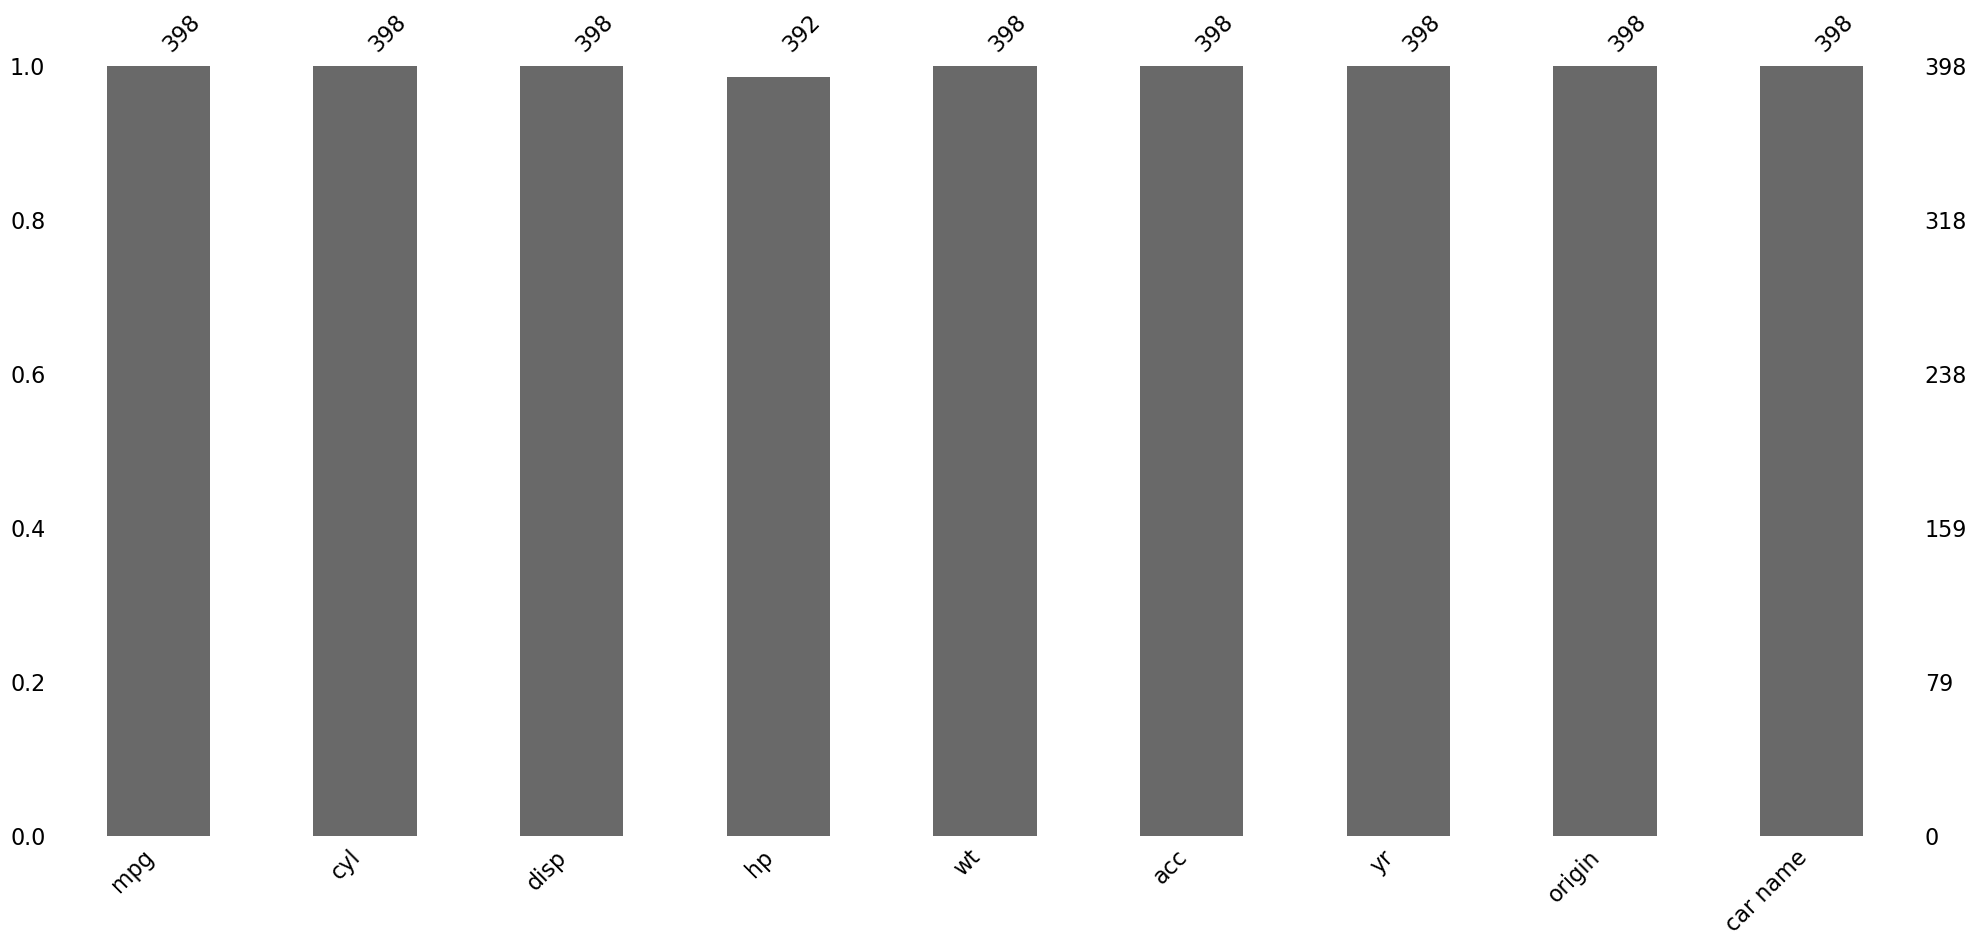

In [ ]:
msno.bar(df) # Visualizing missing values

## Looking the distribution of the hp

<AxesSubplot:xlabel='hp', ylabel='Count'>

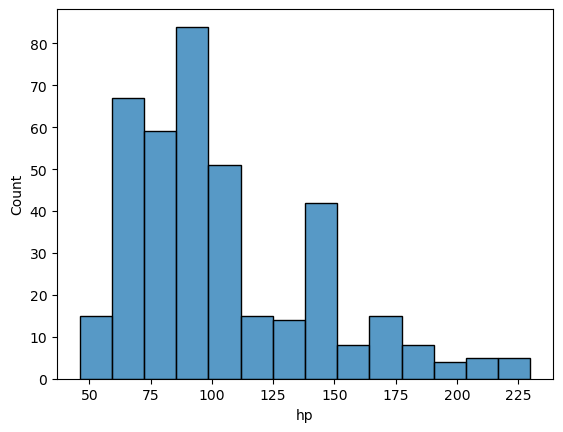

In [ ]:
 # Distribution of hp is skewed, so I will replace it with the median
sns.histplot(df['hp'])

### Function to fill missing values

In [ ]:
# Filling missing values with the median of the variable
df['hp'] = df['hp'].fillna(df['hp'].median())

<AxesSubplot:>

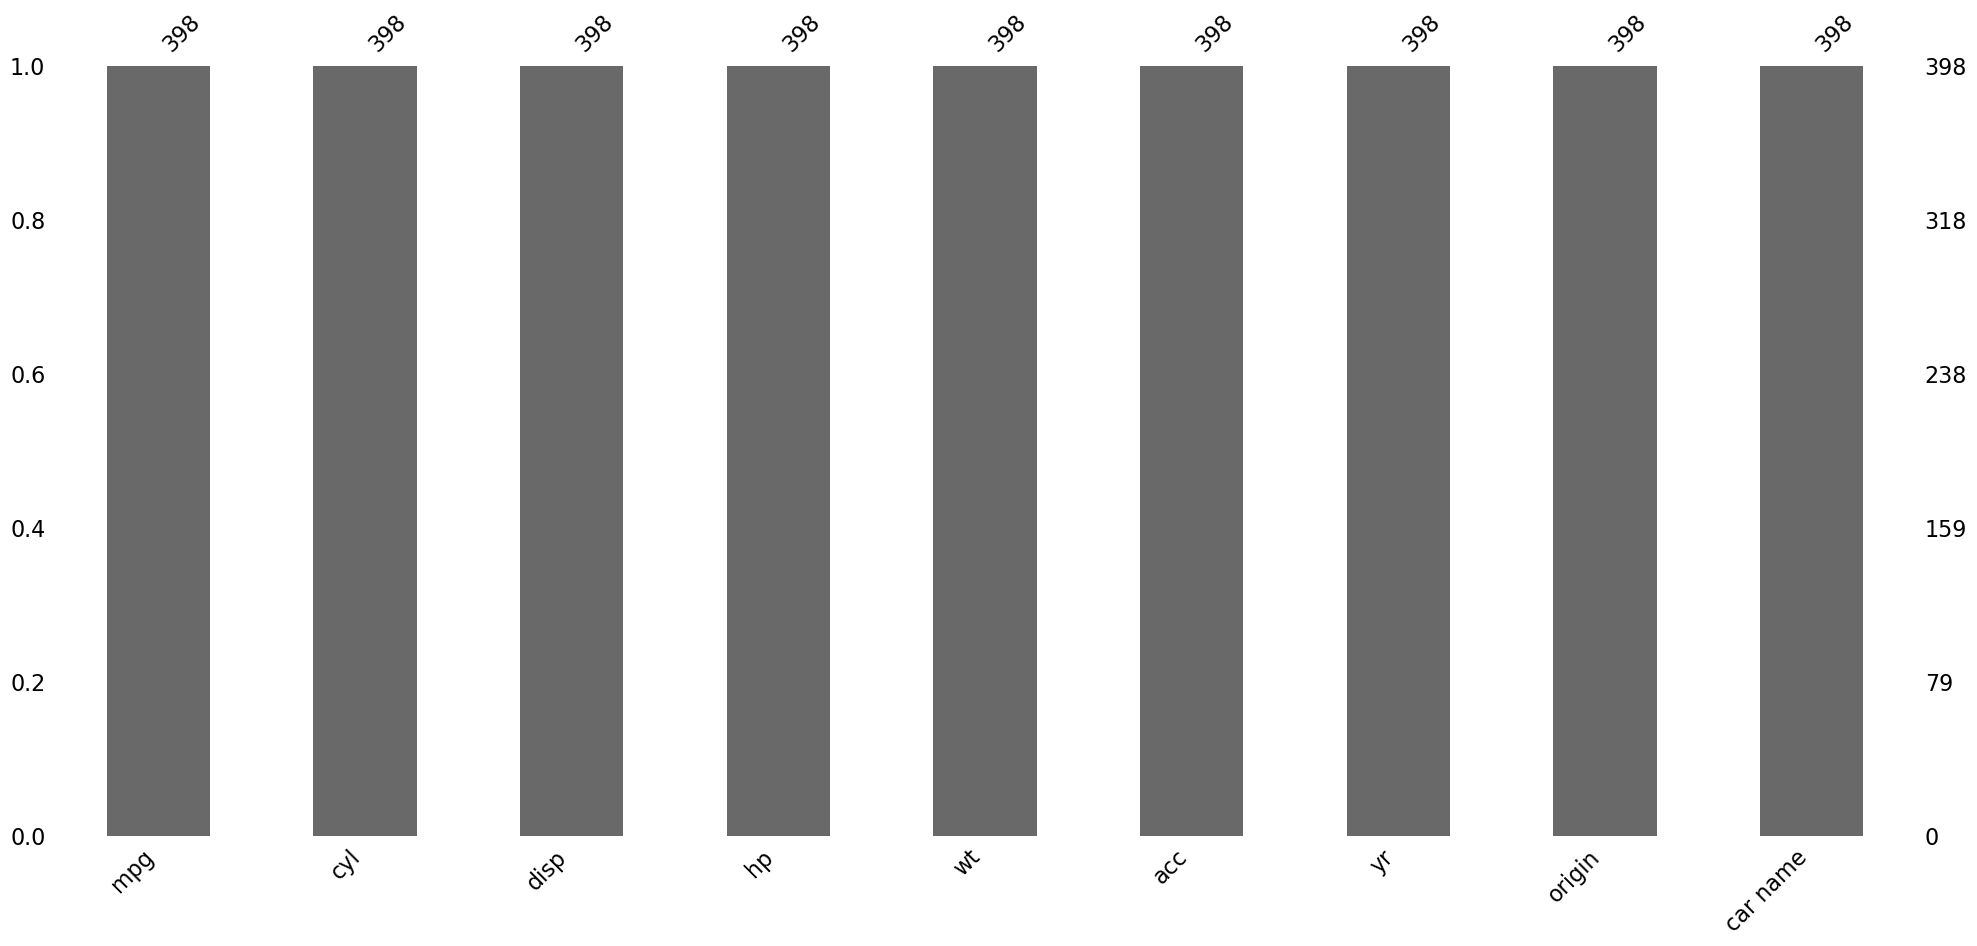

In [ ]:
# Visualizing if there is any missing value
msno.bar(df)

In [ ]:
# Converting the predictor hp to float type
df['hp']= df['hp'].astype('float')
df.dtypes

mpg         float64
cyl           int64
disp        float64
hp          float64
wt          float64
acc         float64
yr            int64
origin        int64
car name     object
dtype: object

In [ ]:
# Sumarizing the predictor with statistical numbers
df.describe()

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.304020,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.222625,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## 3. Identify important features using correlation tests and scatter plots

In [ ]:
# To see which ones have strong correlation with pearson method
df.corr()

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,-0.609409
hp,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,-0.452096
wt,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,0.180662,1.000000


In [ ]:
# to see the correlation between "origin" and "yr" with "mpg" with spearman method
df_sp= df.loc[:,['mpg','yr','origin']]
df_sp.corr( method='spearman')

,mpg,yr,origin
mpg,1.000000,0.573469,0.580694
yr,0.573469,1.000000,0.166551
origin,0.580694,0.166551,1.000000


With the spearman correlation seems to be moderate simple linear correlation between the variables "yr" and "origin" with "mpg"

### Visualizing the correlation with heatman and pairplot


<AxesSubplot:>

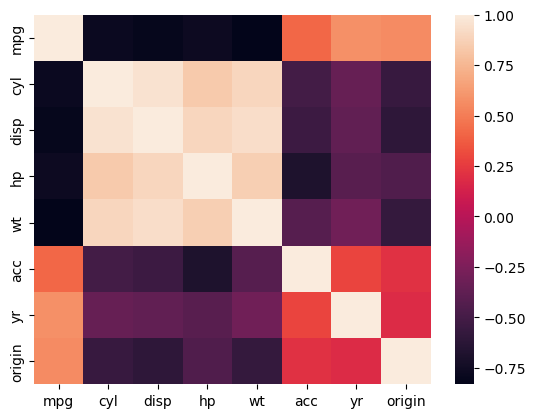

In [ ]:
sns.heatmap(df.corr())

The heatmap shows that the squares that are light pink and those that are very dark, almost black, seem to have strong correlation. I am going to confirm this data with the scatterplot.

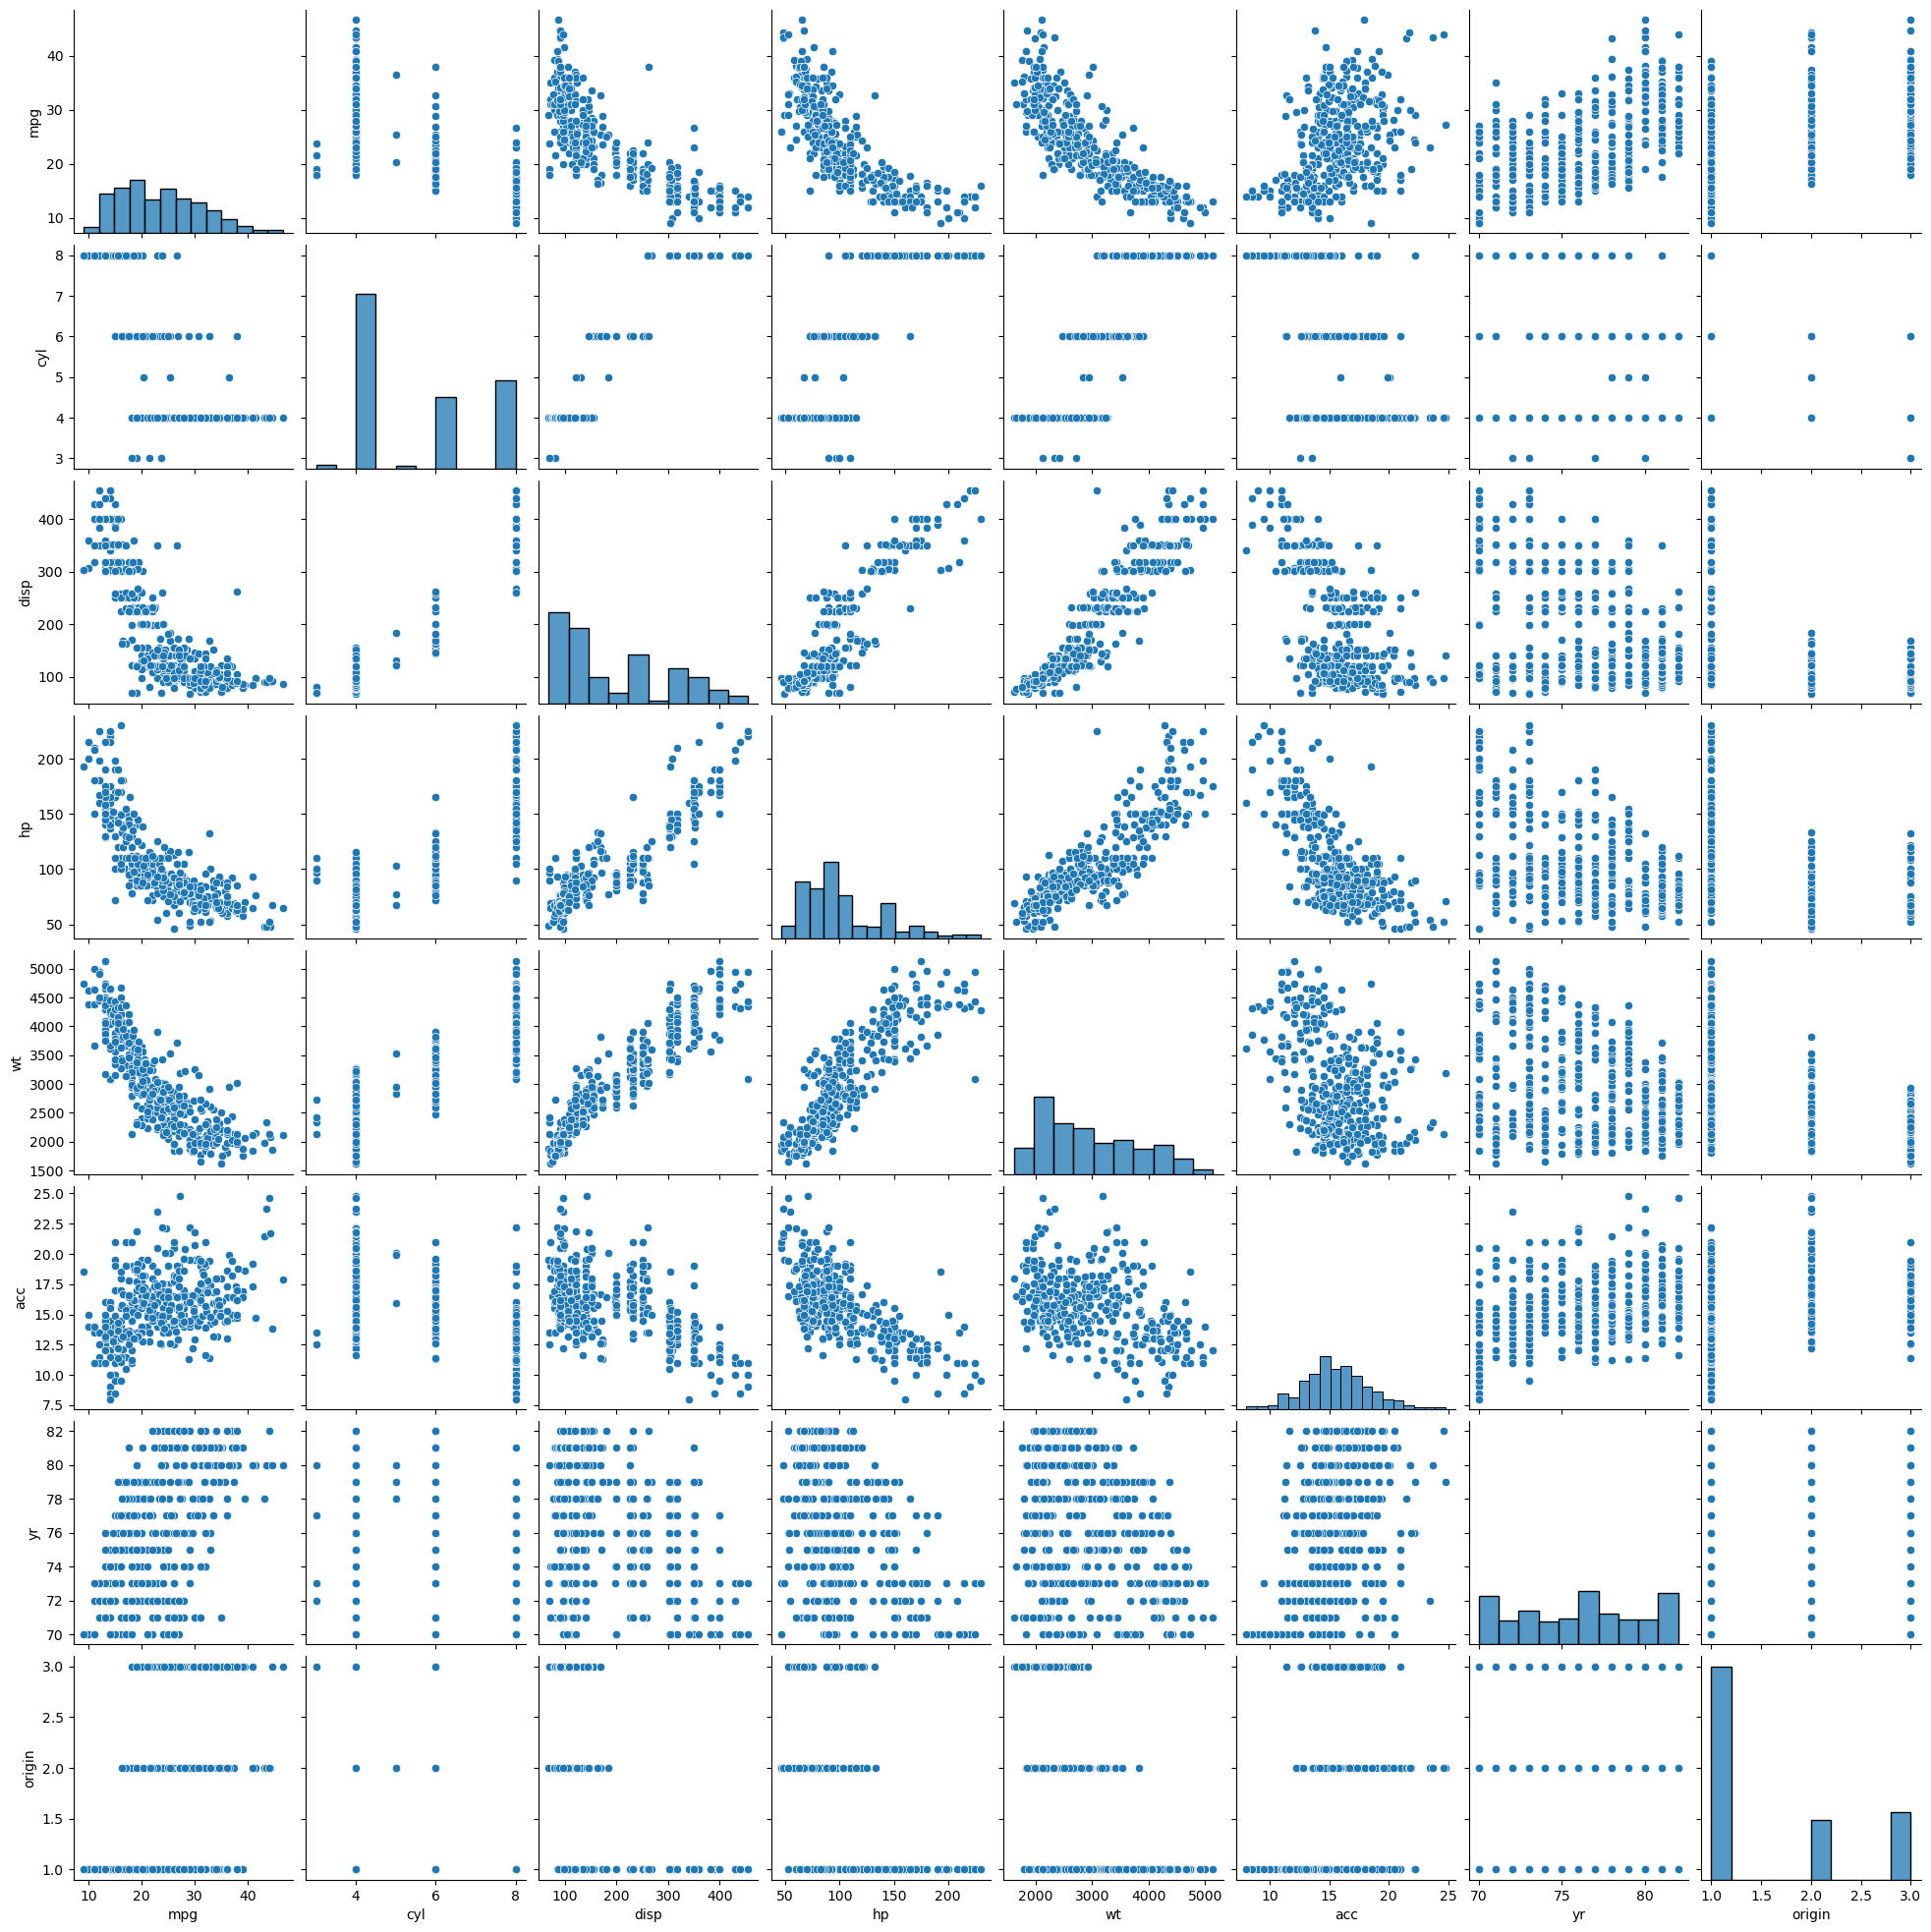

In [ ]:
sns.pairplot(df)

### Interpretation:

With the pairplot, it seems there is some strong correlation between the variables
* cyl is strong negative linear association
* disp, hp, and wt looks a negative polinomial association with mpg
* acc has a weak positive linear relation to mpg
* origin and yr look they have a linear relation with mpg but those are qualitative variables.
* Almost all the variables seem to be skeweed just acc seems to be symmetrically distributed.


In [ ]:
num_df=df.iloc[:, 1:6]
num_df.head()

,cyl,disp,hp,wt,acc
0,8,307.0,130.0,3504.0,12.0
1,8,350.0,165.0,3693.0,11.5
2,8,318.0,150.0,3436.0,11.0
3,8,304.0,150.0,3433.0,12.0
4,8,302.0,140.0,3449.0,10.5


### Testing significance of the correlation with the target "mpg"  and the numerical variables

Calculating the signficance of the Correlation:

Conducting Correlation of Pearson test to establish whether the mpg and numerical  variables are correlated.
* Dependent Variable: mpg
* Independent Variable: Numerical Variables

Ho: The variables mpg and numerical variables do not have a significantly strong linear relation among all subjects in the population.

Ha: The variables mpg and numerical variables have a significantly strong linear relation among all subjects in the population.

In [ ]:
from scipy import stats
def get_pearsonr_and_pvalue(num_df):
    column_list = []
    for column in num_df:
        coef, p_val = stats.pearsonr(num_df[column], df['mpg'])
        if (p_val <0.05 and abs(coef)> 0.5):
            column_list.append(column)
            print(column)
            print("Correlatrion coeficient value is ",coef)
            print("P value is",p_val)
    return column_list
get_pearsonr_and_pvalue(num_df)

cyl
Correlatrion coeficient value is  -0.7753962854205543
P value is 4.503992246176927e-81
disp
Correlatrion coeficient value is  -0.804202824805898
P value is 1.655888910192639e-91
hp
Correlatrion coeficient value is  -0.7734532045742155
P value is 2.000923510430721e-80
wt
Correlatrion coeficient value is  -0.831740933244335
P value is 2.9727995640500577e-103


['cyl', 'disp', 'hp', 'wt']

In [ ]:
coef, p_val = stats.pearsonr(df['acc'], df['mpg'])
print("Correlatrion coeficient value is ",coef)
print("P value is",p_val)


Correlatrion coeficient value is  0.42028891210165065
P value is 1.823091535078553e-18


Taking into consideration the correlation coefficient and the p_value seems to be highly correlated the variables:

    * cyl
    * disp
    * hp
    * wt
Those are numerical variables with P_value >0.05 and the pearson coefficiente > 0.75

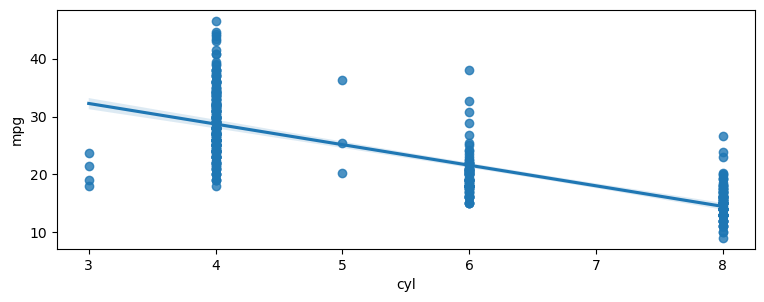

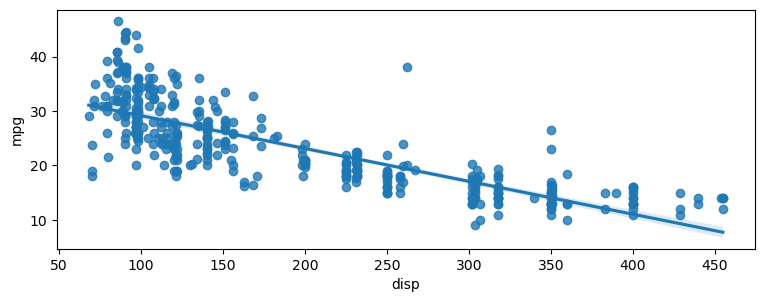

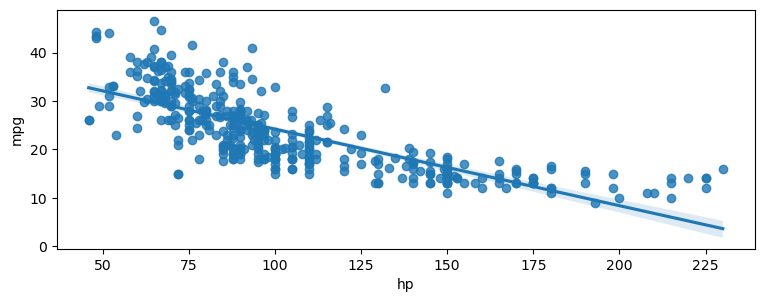

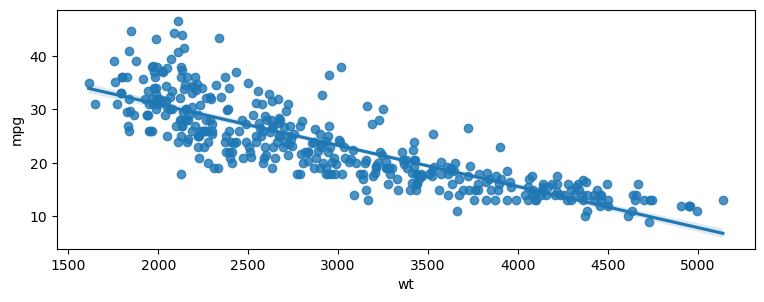

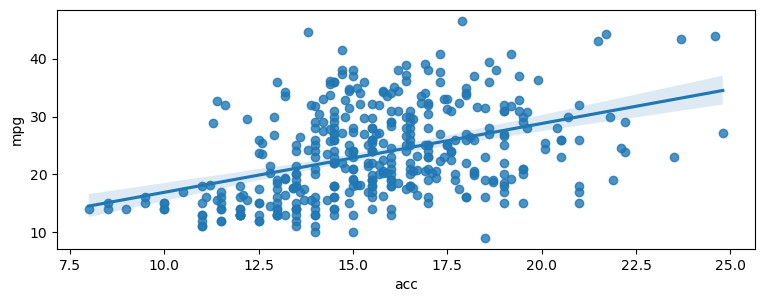

In [ ]:
count=1
for col in num_df.columns:
    plt.subplots(figsize=(9, 18))
    plt.subplot(5,1,count)
    sns.regplot(x= col, y = 'mpg', data=df)
    count+=1
    plt.show()# Putting the least square line in the scatter plot

The least square looks that is fitting in the scatterplot even though some association are not exactly linear, are more like polinomial association.

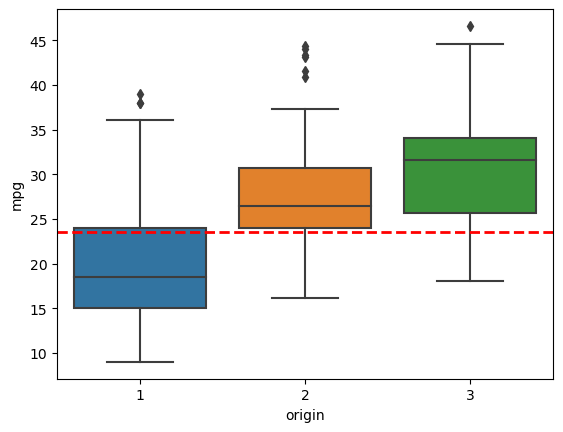

In [ ]:
# The relation between origin and mpg
fig = sns.boxplot(x='origin', y="mpg", data=df)
plt.axhline(df.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

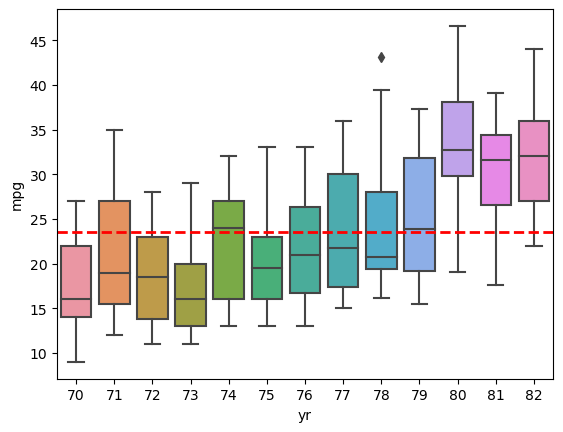

In [ ]:
# The relation between "origin" and "mpg"
fig = sns.boxplot(x='yr', y="mpg", data=df)
plt.axhline(df.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

### Interpretation:

- The origin shows the country code number 2 and 3 their variance is over the mean.
And there are some outliers in the data
- The tendecy in the year predictor seems to increase the mpg by year. There is just one outlier in the data set.

### Testing significance of the correlation with the target "mpg"  and the categorical variables

Calculating the signficance of the Correlation:

Conducting Correlation of Pearson test to establish whether the mpg and categorical  variables are correlated.
* Dependent Variable: mpg
* Independent Variable: Categorical Variables

Ho: The variables mpg and categorical variables do not have a significantly strong linear relation among all subjects in the population.

Ha: The variables mpg and categorical variables have a significantly strong linear relation among all subjects in the population.

In [ ]:
# For the categorical variables
cat_df=df.iloc[:, 6:8]
cat_df.head()

,yr,origin
0,70,1
1,70,1
2,70,1
3,70,1
4,70,1


In [ ]:
# Obtaining the significance of spearman coefficient correlation

from scipy import stats
def get_spearmanr_and_pvalue(cat_df):
    column_list2 = []
    for column2 in cat_df:
        coef, p_val = stats.spearmanr(cat_df[column2], df['mpg'])
        if (p_val <0.05 and abs(coef)> 0.5):
            column_list2.append(column2)
            print(column2)
            print("Correlatrion coeficient value is ",coef)
            print("P value is",p_val)
    return column_list2
get_spearmanr_and_pvalue(cat_df)

yr
Correlatrion coeficient value is  0.5734687031921751
P value is 3.5505352039403755e-36
origin
Correlatrion coeficient value is  0.5806936941648105
P value is 2.949964288840741e-37


['yr', 'origin']

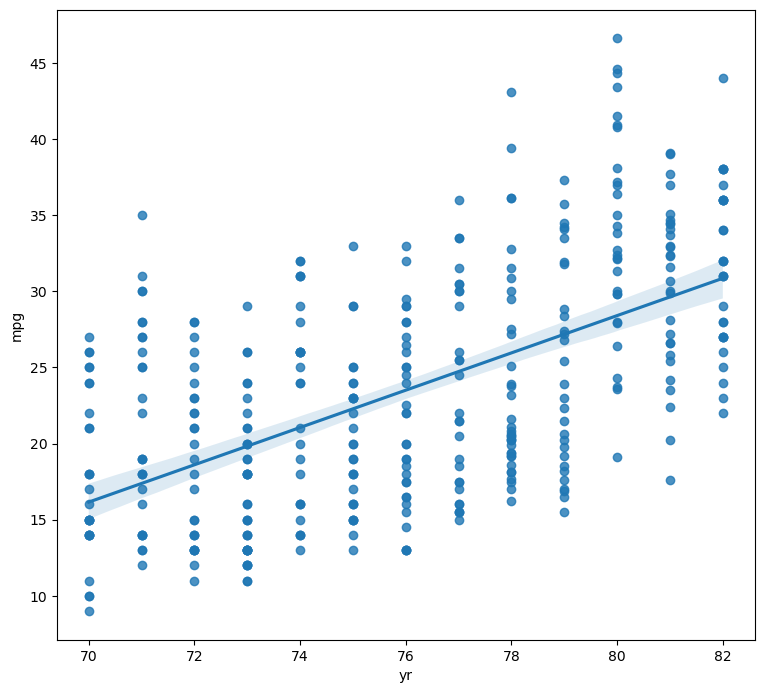

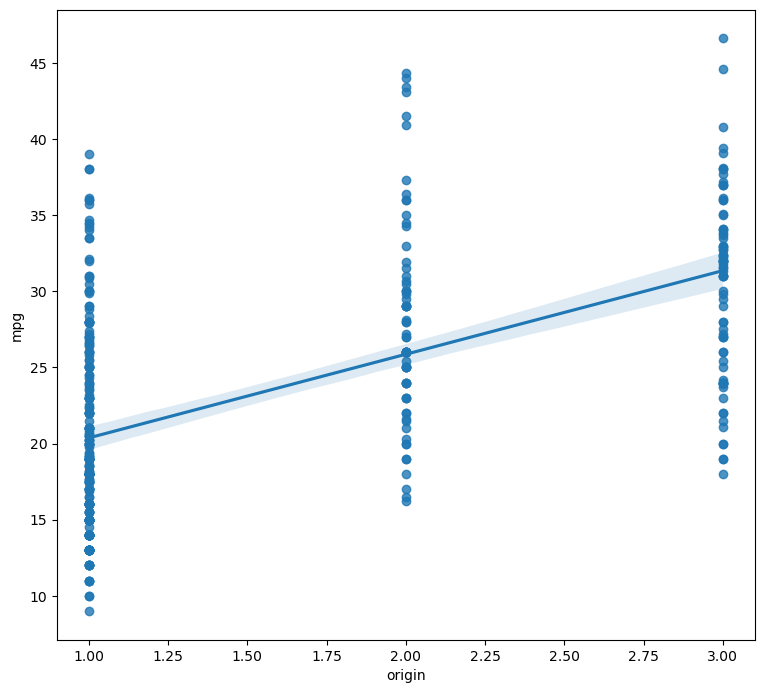

In [ ]:
count=1
for col in cat_df.columns:
    plt.subplots(figsize=(9, 18))
    plt.subplot(2,1,count)
    sns.regplot(x= col, y = 'mpg', data=df)
    count+=1
    plt.show()# Putting the least square line in the scatter plot

### Interpretation:

* The variables "yr" and "origin" have moderate linear correlation with the variable "mpg". P_value <0.05 and coef >0.5.
* The variables "yr" is an ordinal categorical variable that shows a positive linear association .
* The variable "origin" is a nominal variable so it is difficult to conclude something with this association even though it can fit a line.

## Conclusions

The test of correlation shows:

* Numerical variables and potencial predictors: ['cyl', 'disp', 'hp', 'wt'] .The list of variables have strong correlation with "mpg" because the p_value <0.05 and coefficient of perason >0.75.
* "acc" and "mpg" have weak linear correlation with coef <0.5 and p_value <0.05.
* The variable "acc" with  coef<0.5 but p_value <0.05. The variable is significant in the linear correlation but weak
*  Categorical variables and potencial predictors: ['yr', 'origin'] The list of categorical variables have moderate correlation with "mpg" in the test of significance with the method spearman. P_value<0.05 and coef>0.5.
* The graphs of scatterplots seem to fit a least square line.


## 4. Establish a linear regression model and interpret the results of the regression model. Note that split the dataset into 2 using a ratio of 80:20 as for training and testing sets. Train the regression model on training set.

#### The variable to predict is going to be: " mpg" (miles per gallon) a numerical variable.

In [ ]:
#Fitting first a simple linear regression with the predictors

#Assign all the variables in a numpy array.
mpg = df.mpg.values.reshape(len(df['mpg']), 1)
cyl = df.cyl.values.reshape(len(df['cyl']), 1)
disp = df.disp.values.reshape(len(df['disp']), 1)
hp = df.hp.values.reshape(len(df['hp']), 1)
wt= df.wt.values.reshape(len(df['wt']), 1)
acc= df.acc.values.reshape(len(df['acc']), 1)
yr= df.yr.values.reshape(len(df['yr']), 1)
origin= df.origin.values.reshape(len(df['origin']), 1)

In [ ]:
# fit the simple linear regression model with the cyl feature
cyl_model = linear_model.LinearRegression()
cyl_model.fit(cyl, mpg)
coef_cyl = np.array(list(cyl_model.intercept_.flatten()) + list(cyl_model.coef_.flatten()))
coef_cyl = list(coef_cyl)

# fit the simple linear regression model with the disp feature
disp_model = linear_model.LinearRegression()
disp_model.fit(disp, mpg)
coef_disp = np.array(list(disp_model.intercept_.flatten()) + list(disp_model.coef_.flatten()))
coef_disp = list(coef_disp)

# fit the simple linear regression model with the horsepower feature
hp_model = linear_model.LinearRegression()
hp_model.fit(hp, mpg)
coef_hp = np.array(list(hp_model.intercept_.flatten()) + list(hp_model.coef_.flatten()))
coef_hp = list(coef_hp)

# fit the simple linear regression model with the weight feature
wt_model = linear_model.LinearRegression()
wt_model.fit(wt, mpg)
coef_wt = np.array(list(wt_model.intercept_.flatten()) + list(wt_model.coef_.flatten()))
coef_wt = list(coef_wt)

# fit the simple linear regression model with the acceleartion feature
acc_model = linear_model.LinearRegression()
acc_model.fit(acc, mpg)
coef_acc = np.array(list(acc_model.intercept_.flatten()) + list(acc_model.coef_.flatten()))
coef_acc = list(coef_acc)


# fit the simple linear regression model with the weight feature
yr_model = linear_model.LinearRegression()
yr_model.fit(yr, mpg)
coef_yr = np.array(list(yr_model.intercept_.flatten()) + list(yr_model.coef_.flatten()))
coef_yr = list(coef_yr)

# fit the simple linear regression model with the weight feature
origin_model = linear_model.LinearRegression()
origin_model.fit(origin, mpg)
coef_origin = np.array(list(origin_model.intercept_.flatten()) + list(origin_model.coef_.flatten()))
coef_origin = list(coef_origin)


# store the above results in a dictionary and then display using a dataframe
data_mpg = {}
data_mpg["cyl"] = coef_cyl
data_mpg["disp"] = coef_disp
data_mpg["hp"] = coef_hp
data_mpg["wt"] = coef_wt
data_mpg["acc"] = coef_acc
data_mpg["yr"] = coef_yr
data_mpg["origin"] = coef_origin

metric_df =  pd.DataFrame(data_mpg)
metric_df.index = ['Intercept', 'Coefficient']
metric_df

,cyl,disp,hp,wt,acc,yr,origin
Intercept,42.949314,35.174750,40.011318,46.317364,4.969793,-69.555602,14.878297
Coefficient,-3.562887,-0.060282,-0.158160,-0.007677,1.191205,1.224446,5.490795


###  Interpretation:
* As we can see, the coefficients of the predictors "cyl", "disp", "hp" and "wt", have a negative linear association with "mpg".
* The variable "acc" and "yr" have a positive association like we can see in the scatterplot before.
* The variables "origin" should be tranformed with one-hot encoding.

### Evaluating the baseline model

In [ ]:
# Let's calculate R_square
cyl_rsq = cyl_model.score(cyl, mpg)
disp_rsq = disp_model.score(disp, mpg)
hp_rsq = hp_model.score(hp, mpg)
wt_rsq = wt_model.score(wt, mpg)
acc_rsq = acc_model.score(acc, mpg)
yr_rsq = yr_model.score(yr, mpg)
origin_rsq = origin_model.score(origin, mpg)

print("cylinders simple linear regression R-Square :", cyl_rsq)
print("displacemnt simple linear regression R-Square :", disp_rsq)
print("horse power simple linear regression R-Square :", hp_rsq)
print("weight simple linear regression R-Square :", wt_rsq)
print("acceleration simple linear regression R-Square :", acc_rsq)
print("year  simple linear regression R-Square :", yr_rsq)
print("origin simple linear regression R-Square :", origin_rsq)
list_rsq = [cyl_rsq, disp_rsq, hp_rsq, wt_rsq, acc_rsq, yr_rsq, origin_rsq ]
list_rsq

cylinders simple linear regression R-Square : 0.6012393994439938
displacemnt simple linear regression R-Square : 0.6467421834257859
horse power simple linear regression R-Square : 0.5982298596661232
weight simple linear regression R-Square : 0.6917929800341573
acceleration simple linear regression R-Square : 0.176642769635589
year  simple linear regression R-Square : 0.33555041147055686
origin simple linear regression R-Square : 0.3174763079292734


[0.6012393994439938,
 0.6467421834257859,
 0.5982298596661232,
 0.6917929800341573,
 0.176642769635589,
 0.33555041147055686,
 0.3174763079292734]

In [ ]:
metric_df.loc['R-Squared'] = list_rsq
metric_df

,cyl,disp,hp,wt,acc,yr,origin
Intercept,42.949314,35.174750,40.011318,46.317364,4.969793,-69.555602,14.878297
Coefficient,-3.562887,-0.060282,-0.158160,-0.007677,1.191205,1.224446,5.490795
R-Squared,0.601239,0.646742,0.598230,0.691793,0.176643,0.335550,0.317476


### Interpretation:

* We can see that weight ('wt') is the highest R_square predictor with 69% followed by 'disp', 'cyl' and 'hp'.
* The lowest predictor is acceleration('acc') with 17%, followed by 'origin' with 0.31 but this predictor is nominal variable as mentioned before.


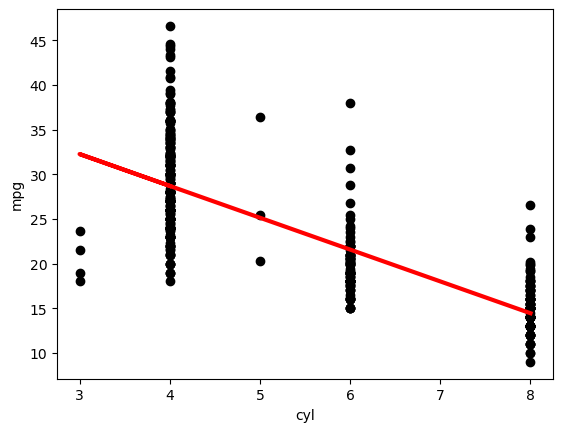

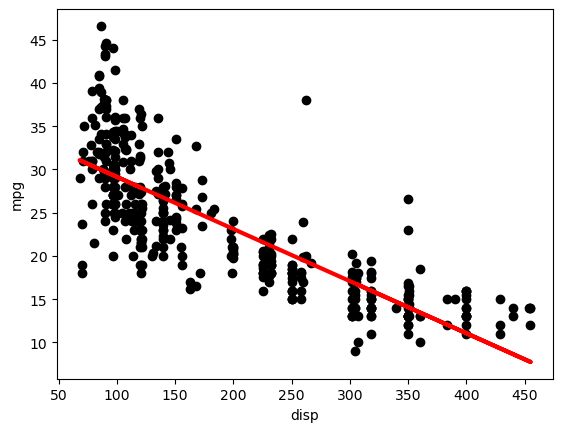

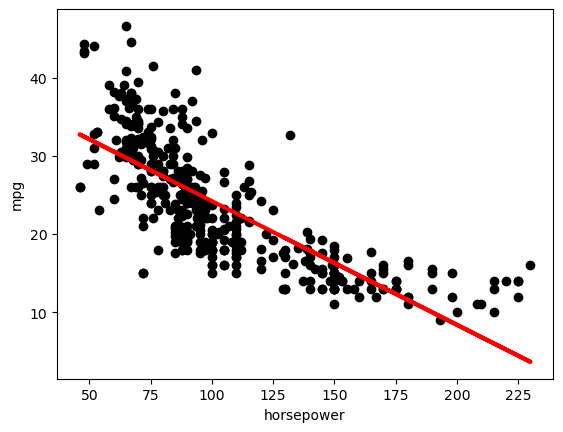

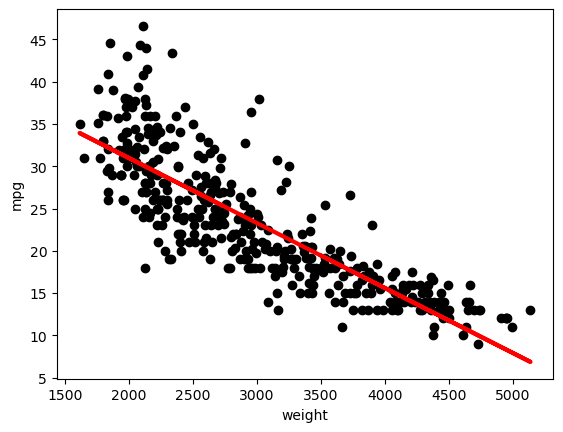

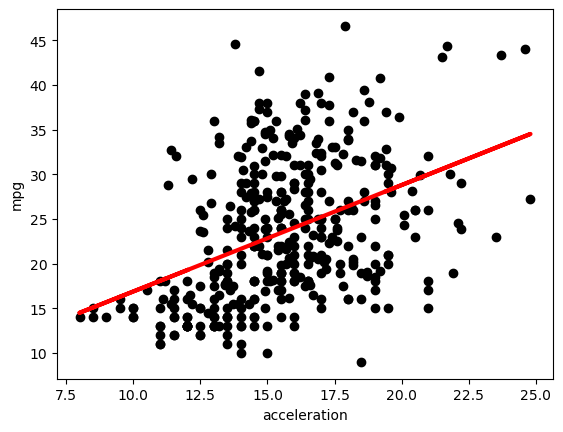

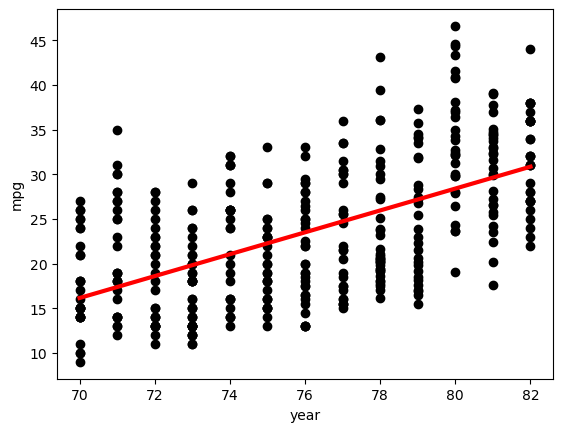

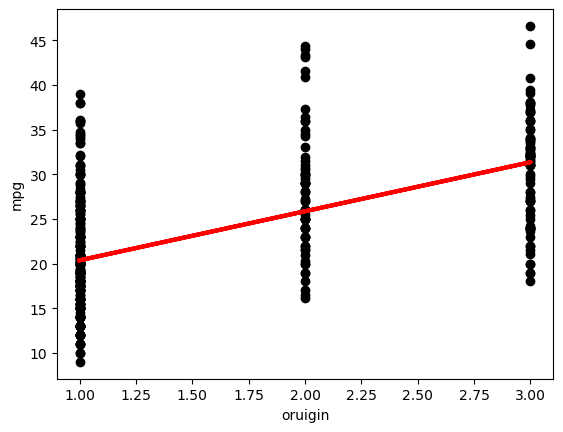

In [ ]:
plt.scatter(cyl, mpg,  color='black')
plt.xlabel('cyl')
plt.ylabel('mpg')
plt.plot(cyl, cyl_model.predict(cyl), color='red', linewidth=3)
plt.show()

plt.scatter(disp, mpg,  color='black')
plt.xlabel('disp')
plt.ylabel('mpg')
plt.plot(disp, disp_model.predict(disp), color='red', linewidth=3)
plt.show()

plt.scatter(hp, mpg,  color='black')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.plot(hp, hp_model.predict(hp), color='red', linewidth=3)
plt.show()

plt.scatter(wt, mpg,  color='black')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.plot(wt, wt_model.predict(wt), color='red', linewidth=3)
plt.show()

plt.scatter(acc, mpg,  color='black')
plt.xlabel('acceleration')
plt.ylabel('mpg')
plt.plot(acc, acc_model.predict(acc), color='red', linewidth=3)
plt.show()

plt.scatter(yr, mpg,  color='black')
plt.xlabel('year')
plt.ylabel('mpg')
plt.plot(yr, yr_model.predict(yr), color='red', linewidth=3)
plt.show()

plt.scatter(origin, mpg,  color='black')
plt.xlabel('oruigin')
plt.ylabel('mpg')
plt.plot(origin, origin_model.predict(origin), color='red', linewidth=3)
plt.show()

We can see that there is an association when we fit the least square line.

## Multiple Linear Regression|

In [ ]:
#Building the baseline of multiple linear regression model
linear_values= df[['cyl', 'disp', 'acc','hp','wt','yr', 'origin']]
mpg_model= linear_model.LinearRegression()
mpg_model.fit(linear_values, df['mpg'])

LinearRegression()

In [ ]:
# Calculating MAE of the baseline
df['mpg_predicted']  = mpg_model.predict(linear_values)
df['error'] = (df['mpg_predicted'] - df['mpg'])**2
MSE_mpg = df['error'].mean()
MSE_mpg


10.910811055666654

In [ ]:
#R_square values of the baseline
mpg_model.score(linear_values, df['mpg'])

0.8209467359784417

In [ ]:
# Details of the model.
import statsmodels.formula.api as smf
linear_m1 = smf.ols(formula= 'mpg ~ cyl+disp+acc+hp+wt+yr+origin', data = df).fit()
linear_m1.params
print(linear_m1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.4
Date:                Sat, 28 Jan 2023   Prob (F-statistic):          2.15e-141
Time:                        20:06:56   Log-Likelihood:                -1040.3
No. Observations:                 398   AIC:                             2097.
Df Residuals:                     390   BIC:                             2128.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.9066      4.604     -3.890      0.0

### Interpretation:
* The 82% of the time the model can explain all the variation of "mpg", using all the predictors, we can see that it is better than the simple linear regression. For now, it is not a bad fit. The adjusted R_square is penalizing the other factors that can affect the model, but there is not much difference in those values.
* The predictors 'hp', 'acc' and 'cyl' have the higher p_value >0.05. These predictors fail to reject Ho and those are not significant as predictor in the model.
* Also there is an alert for multicollinearity that affects the model.


### Splitting data for training and test

In [ ]:
# Training the lineal regression model
from sklearn.linear_model import LinearRegression
X=df[['cyl', 'disp', 'acc','hp','wt','yr', 'origin']]
y= df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
linreg=LinearRegression().fit(X_train,y_train)

In [ ]:
print('linear model coeff(βi):{}'
      .format(linreg.coef_))
print('linear model intercept (β0):{:.3f}'
      .format(linreg.intercept_))
print('R-squared score training:{:.3f}'
      .format(linreg.score(X_train, y_train)))


linear model coeff(βi):[-0.44013886  0.0157262   0.07776161 -0.00888006 -0.00649699  0.7726687
  1.40781229]
linear model intercept (β0):-18.917
R-squared score training:0.826


### Interpretation:

* The model has good performance with R_square of 82% of the training data
* The values 'cyl', 'wt', and 'yr' are coefficient with negative correlation with 'mpg'.
* The evaluation of the model is going to be in the next section looking how well the model predict the unseen data in the test set.

## 5. Check the performance of the regression on the test set, using RMSE and MAE indicators. Make a conclusion on the performance of the model.


In [ ]:
# Making the predictor of the test set

prediction= linreg.predict(X_test)
prediction

array([15.47617757, 24.78767891, 10.25600417, 21.52085574, 24.69450587,
       31.79743729, 27.92902796, 22.80658853, 32.42610068, 23.40366259,
       19.04249851, 27.45532224, 31.07909218, 17.91050761, 17.3296776 ,
       30.89485878, 18.59290555, 29.21764834, 13.69776617, 29.33424244,
       21.41580139, 20.76355005, 32.02618157, 17.38113431, 31.26150382,
       18.94167445, 23.58190173, 25.97839007, 15.25700388, 23.40984639,
       14.87174132, 21.10936916, 11.44729365, 27.2930484 , 30.9082526 ,
       36.69018204, 31.27655533, 34.00329675, 22.08714225, 16.67673672,
       24.7292617 , 13.73618782, 24.47348375, 27.71320917, 24.48510213,
       17.73762178, 24.71651615, 29.00206156, 30.02029645, 18.12423255,
       21.12566982, 28.13506028, 29.66830251, 30.60024302, 27.55394091,
       20.61461494, 10.2421999 , 27.01383064, 23.86128487,  9.22054896,
       21.98202146, 36.19496393, 12.45534674,  8.84388491, 29.29483635,
       21.36832414, 22.77014688, 25.76013503, 30.05809062, 29.84

In [ ]:
mae = mean_absolute_error(y_test, prediction)
r2 =r2_score(y_test, prediction)
rmse =mean_squared_error(y_test, prediction, squared= False)
print('Mean absoluto error (test):{:.3f}'.format(mae))
print('R-squared score (test):{:.3f}'.format(r2))
print('Root Mean square error (test):{:.3f}'.format(rmse))


Mean absoluto error (test):2.539
R-squared score (test):0.792
Root Mean square error (test):3.173


### Interpretation:
* The results of the test set are not performing better than the training set. The R_square for the training set is 83% and the testing set is 79%  that means that might be generating for over fitting situation. So the model is good for the data training but not generalize well to new data.
* The MAE says that there is a distancie more or less 2.54 away  from the actual mean of mpg.Since the MAE is not large is a good sing.
* The RMSE shows a difference in the interval more o less 2 times the value of RMSE from the predicted value of mpg. Since the RMSE is 3.17 not large is a good sing.
* In overall, the results are favorable.

## Adicional  Features engineering : Tranform the categorical  variable 'origin' and create some interactors

In [ ]:
# Categorical Encoding
# one hot encoding df[['origin']]
#drop origin_1 to prevent multicolinearity.
df_dum= pd.get_dummies(df[['cyl', 'disp', 'acc','hp','wt','yr', 'origin']], columns=['origin'], drop_first = True)
df_dum.head()


,cyl,disp,acc,hp,wt,yr,origin_2,origin_3
0,8,307.0,12.0,130.0,3504.0,70,0,0
1,8,350.0,11.5,165.0,3693.0,70,0,0
2,8,318.0,11.0,150.0,3436.0,70,0,0
3,8,304.0,12.0,150.0,3433.0,70,0,0
4,8,302.0,10.5,140.0,3449.0,70,0,0


In [ ]:
df_dum.columns

Index(['cyl', 'disp', 'acc', 'hp', 'wt', 'yr', 'origin_2', 'origin_3'], dtype='object')

### Adding 2 interaction terms into linear regression model

In [ ]:
# Let wt and disp as new interactor because p_values<0.05 for these predictors

df_dum['wt_disp'] = df_dum['wt']*df_dum['disp']

df_dum.head()
# Let yr and wt as new interactor because p_values<0.05 for these predictors

df_dum['yr_wt'] = df_dum['yr']*df_dum['wt']

df_dum.head()

,cyl,disp,acc,hp,wt,yr,origin_2,origin_3,wt_disp,yr_wt
0,8,307.0,12.0,130.0,3504.0,70,0,0,1075728.0,245280.0
1,8,350.0,11.5,165.0,3693.0,70,0,0,1292550.0,258510.0
2,8,318.0,11.0,150.0,3436.0,70,0,0,1092648.0,240520.0
3,8,304.0,12.0,150.0,3433.0,70,0,0,1043632.0,240310.0
4,8,302.0,10.5,140.0,3449.0,70,0,0,1041598.0,241430.0


### Parameters with the new added features

In [ ]:
import statsmodels.formula.api as smf
linear_m2 = smf.ols(formula= 'mpg ~ cyl+disp+acc+hp+wt+yr+origin_2+origin_3+wt_disp', data = df_dum).fit()
linear_m2.params
print(linear_m2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     267.5
Date:                Sat, 28 Jan 2023   Prob (F-statistic):          2.21e-160
Time:                        20:06:56   Log-Likelihood:                -989.59
No. Observations:                 398   AIC:                             1999.
Df Residuals:                     388   BIC:                             2039.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.1097      4.260     -1.669      0.0

### Interpretation:

* The value of r_square improve to 0.86, looks better than before. Now, can predict 86% of the times the variance of the values of mpg.
* There is an alert for multicolinearity so is not good.   
* The p_value of acc and cyl is still showing that the predictor are insignificant because are more than >0.05

In [ ]:
#VIF (ok:<5, between 5-10 check, remove:>10)
from statsmodels.stats.outliers_influence import variance_inflation_factor

X= df_dum[['cyl','disp', 'acc', 'hp','wt', 'yr', 'origin_2', 'origin_3', 'wt_disp']]
y=df['mpg']

import statsmodels.api as sm

X_constant= sm.add_constant(X)
VIF =[variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]

VIF_df=pd.DataFrame({'VIF':VIF[1:]}, index= X.columns).T
VIF_df

,cyl,disp,acc,hp,wt,yr,origin_2,origin_3,wt_disp
VIF,11.14894,61.454174,2.555507,9.667497,15.994659,1.295678,1.727893,1.939805,62.357909


In [ ]:
#VIF_df<10

for i in VIF_df.columns:
    if float(VIF_df[i]) <=10:
        print(i)

acc
hp
yr
origin_2
origin_3


### Interpretation:  
* The values that pass the test of VIF are just 5 predictors: 'acc', 'hp', 'yr', 'origin_2', and 'origin_3'.
But it does not make sense to remove the other variables.

* We can see that engine displacement ('wt_disp') is the highest VIF predictor with 62.00 followed by 'disp' and 'wt'.
* The multicollinearity is not improving with the interactors



### Model2

In [ ]:
# Training the lineal regression model2
from sklearn.linear_model import LinearRegression
X=df_dum[['cyl','disp', 'acc', 'hp','wt', 'yr', 'origin_2', 'origin_3', 'wt_disp']]
y= df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
linreg2=LinearRegression().fit(X_train,y_train)
print('linear model coeff(βi):{}'
      .format(linreg2.coef_))
print('linear model intercept (β0):{:.3f}'
      .format(linreg2.intercept_))
print('R-squared score training:{:.3f}'
      .format(linreg2.score(X_train, y_train)))
print('R-squared score (test):{:.3f}'
      .format(linreg2.score(X_test, y_test)))

linear model coeff(βi):[ 2.75683829e-01 -5.82942774e-02  9.16013044e-02 -2.88494053e-02
 -1.12394837e-02  8.44106622e-01  2.00242516e+00  1.36467270e+00
  2.15188641e-05]
linear model intercept (β0):-10.581
R-squared score training:0.861
R-squared score (test):0.858


In [ ]:
prediction2= linreg2.predict(X_test)
prediction2

second_mae = mean_absolute_error(y_test, prediction2)
second_r2 =r2_score(y_test, prediction2)
second_rmse =mean_squared_error(y_test, prediction2, squared= False)
print('Mean absoluto error (test):{:.3f}'.format(second_mae))
print('R-squared score (test):{:.3f}'.format(second_r2))
print('Root Mean square error (test):{:.3f}'.format(second_rmse))

Mean absoluto error (test):2.163
R-squared score (test):0.858
Root Mean square error (test):2.741


### Interpretation to the performance of the model 2

* The R_square for the training set of the model 2 is improved with respect to the baseline model.
* The R_square for the training set es 86% and the r_square in the testing set is 85% almost similar this means that have a good fit.   
* The MAE says that there is a distance more or less 2.16 away from the actual mean of mpg. Since the MAE is not large is a good sing.
* The RMSE shows a difference in the interval more o less 2 times the value of RMSE from the predicted value of mpg. Since the RMSE is 2.74 not large is a good sing.
